In [9]:
import csv
import statistics
from collections import Counter

In [10]:
csv_file_path = './winequality-red.csv'
column_name = "total sulfur dioxide"

data = []

with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(float(row[column_name]))

# Before Outlier Removal

### Mean, median, mode and standard deviation of the data

In [11]:
mean = statistics.mean(data)

median = statistics.median(data)

data_counter = Counter(data)
mode_tuple = Counter(data).most_common(1)[0]
mode = mode_tuple[0]

std_deviation = statistics.stdev(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode_tuple[0]} appears {mode_tuple[1]} times")
print(f"Standard Deviation: {std_deviation}")

Mean: 46.46779237023139
Median: 38.0
Mode: 28.0 appears 43 times
Standard Deviation: 32.89532447829908


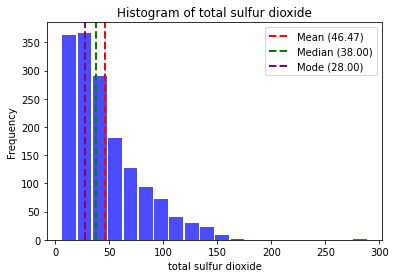

In [12]:
import matplotlib.pyplot as plt

plt.hist(data, bins=20, color='blue', alpha=0.7, rwidth=0.9)
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean:.2f})')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median:.2f})')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Mode ({mode:.2f})')
plt.legend()

# Outlier Detection and removal

In [13]:
import numpy as np

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
# lower outlier boundary
lob = q1 - 1.5*iqr
# upper outlier boundary
uob = q3 + 1.5*iqr

print(f"IQR: {iqr:.2f}")
print(f"Q1: {q1:.2f}")
print(f"Q3: {q3:.2f}")
print(f"LOB: {lob:.2f}")
print(f"UOB: {uob:.2f}")


IQR: 40.00
Q1: 22.00
Q3: 62.00
LOB: -38.00
UOB: 122.00


In [14]:
from copy import deepcopy


old_data = deepcopy(data)

# conduct outlier removal on data
data = []
for item in old_data:
	if item > lob and item < uob:
		data.append(item)

# New Statistics

In [15]:
mean = statistics.mean(data)

median = statistics.median(data)

data_counter = Counter(data)
mode_tuple = Counter(data).most_common(1)[0]
mode = mode_tuple[0]

std_deviation = statistics.stdev(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode_tuple[0]} appears {mode_tuple[1]} times")
print(f"Standard Deviation: {std_deviation}")

Mean: 42.843608046722906
Median: 37.0
Mode: 28.0 appears 43 times
Standard Deviation: 27.016767395083356


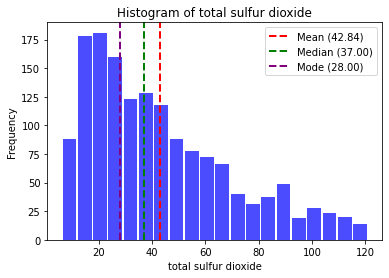

In [16]:
plt.hist(data, bins=20, color='blue', alpha=0.7, rwidth=0.9)
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean:.2f})')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median:.2f})')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Mode ({mode:.2f})')
plt.legend()